In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%matplotlib notebook

In [17]:
covid19_df = pd.read_csv("C:/Users/Saanvi/Downloads/owid-covid-data1.csv")

In [18]:
covid19_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,12/31/2019,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,1/1/2020,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,1/2/2020,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,1/3/2020,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,1/4/2020,0.0,0.0,0.0,0.0


In [19]:
covid19_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
23808,NaN,NaN,International,2/28/2020,705.0,0.0,4.0,0.0
23809,NaN,NaN,International,2/29/2020,705.0,0.0,6.0,2.0
23810,NaN,NaN,International,3/1/2020,705.0,0.0,6.0,0.0
23811,NaN,NaN,International,3/2/2020,705.0,0.0,6.0,0.0
23812,NaN,NaN,International,3/10/2020,696.0,-9.0,7.0,1.0


In [20]:
covid19_df.shape

(23813, 8)

In [21]:
covid19_df.isna().sum()

iso_code         64
continent       231
location          0
date              0
total_cases     218
new_cases       218
total_deaths    218
new_deaths      218
dtype: int64

In [26]:
covid19_df_latest = covid19_df[covid19_df['date']=="6/14/2020"]
covid19_df_latest.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
156,AFG,Asia,Afghanistan,6/14/2020,24102.0,556.0,451.0,5.0
254,ALB,Europe,Albania,6/14/2020,1464.0,48.0,36.0,0.0
416,DZA,Africa,Algeria,6/14/2020,10810.0,112.0,760.0,9.0
509,AND,Europe,Andorra,6/14/2020,853.0,0.0,51.0,0.0
594,AGO,Africa,Angola,6/14/2020,138.0,8.0,6.0,1.0


In [27]:
covid19_df_latest['new_cases'].sum()

266822.0

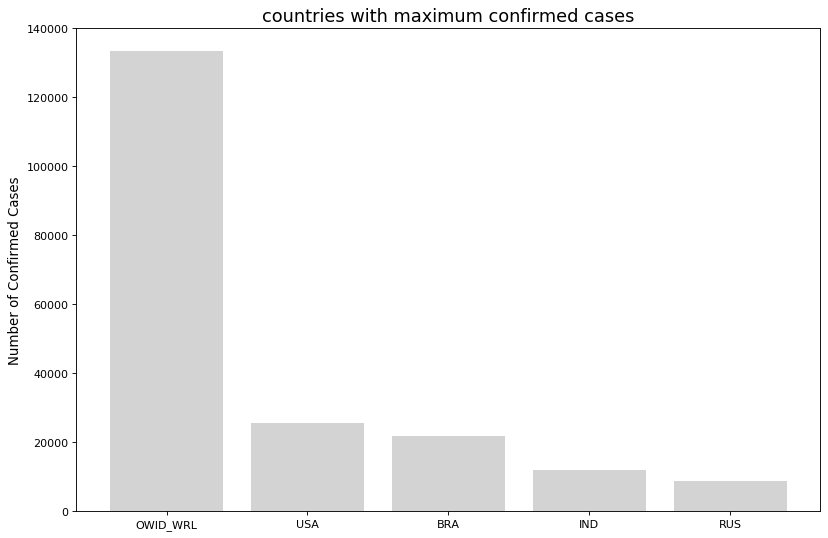

In [28]:
covid19_df_latest = covid19_df_latest.sort_values(by=['new_cases'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['iso_code'][:5], covid19_df_latest['new_cases'][:5],
        align='center',color='lightgrey')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('countries with maximum confirmed cases', size = 16)
plt.show()

In [19]:
covid19_df_latest['total_deaths'].sum()


571853

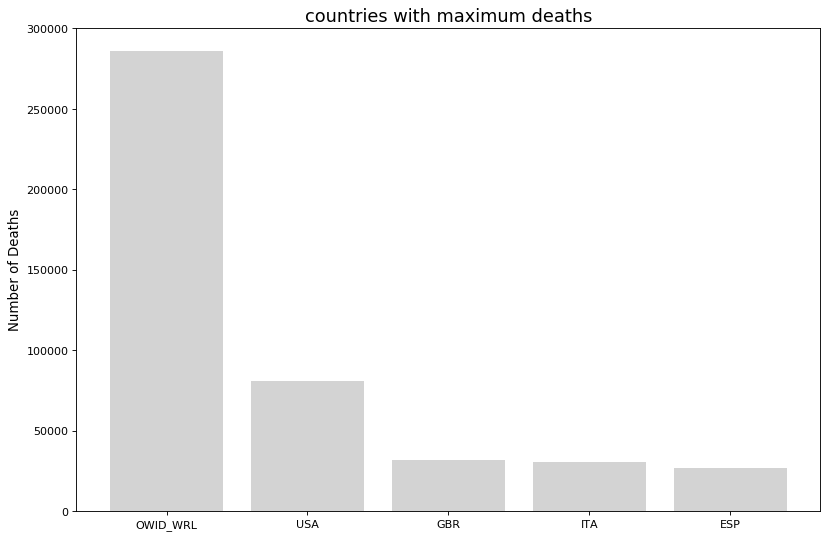

In [20]:
covid19_df_latest = covid19_df_latest.sort_values(by=['total_deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['iso_code'][:5], covid19_df_latest['total_deaths'][:5], align='center',color='lightgrey')
plt.ylabel('Number of Deaths', size = 12)
plt.title('countries with maximum deaths', size = 16)
plt.show()

In [21]:
covid19_df_latest['total_deaths/total_cases'] = (covid19_df_latest['total_cases']/covid19_df_latest['total_deaths']).round(2)
covid19_df_latest['total_deaths/total_cases'] = [np.nan if x == float("inf") else x for x in covid19_df_latest['total_deaths/total_cases']]
covid19_df_latest = covid19_df_latest.sort_values(by=['total_deaths/total_cases'], ascending=True, na_position='last')
covid19_df_latest.iloc[:10]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths/total_cases
12565,NIC,Nicaragua,5/12/2020,16,0,5,0,3.20
15990,SXM,Sint Maarten (Dutch part),5/12/2020,76,0,15,0,5.07
5907,FRA,France,5/12/2020,139519,456,26643,263,5.24
1427,BEL,Belgium,5/12/2020,53449,368,8707,51,6.14
17774,YEM,Yemen,5/12/2020,56,5,9,1,6.22
6173,GBR,United Kingdom,5/12/2020,223060,3877,32065,210,6.96
17540,VGB,British Virgin Islands,5/12/2020,7,0,1,0,7.00
8802,ITA,Italy,5/12/2020,219814,744,30739,179,7.15
7634,HUN,Hungary,5/12/2020,3313,29,425,4,7.80
12705,NLD,Netherlands,5/12/2020,42788,161,5456,16,7.84


In [23]:
covid19_dflatest = covid19_df_latest.drop(['date'], axis = 1)
covid19_df_latest.shape

(210, 8)

In [5]:
excel_file = pd.ExcelFile("C:/Users/Saanvi/Downloads/locations.xlsx")
world_country_df = excel_file.parse('locations')

In [24]:
world_country_df.head()
world_country_df.shape

(210, 5)

In [26]:
world_country_df.head()


,countriesAndTerritories,location,continent,population_year,population
0,Afghanistan,Afghanistan,Asia,2020.0,38928341.0
1,Albania,Albania,Europe,2020.0,2877800.0
2,Algeria,Algeria,Africa,2020.0,43851043.0
3,Andorra,Andorra,Europe,2020.0,77265.0
4,Angola,Angola,Africa,2020.0,32866268.0


In [27]:
covid19_df_latest = pd.merge(covid19_df_latest, world_country_df, on="location")
covid19_df_latest['Cases/10million'] = (covid19_df_latest['total_cases']/covid19_df_latest['population'])*10000000
covid19_df_latest.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths/total_cases,countriesAndTerritories,continent,population_year,population,Cases/10million
0,NIC,Nicaragua,5/12/2020,16,0,5,0,3.20,Nicaragua,North America,2020.0,6624554.0,24.152569
1,SXM,Sint Maarten (Dutch part),5/12/2020,76,0,15,0,5.07,Sint_Maarten,North America,2020.0,42882.0,17723.053962
2,FRA,France,5/12/2020,139519,456,26643,263,5.24,France,Europe,2020.0,65273512.0,21374.520188
3,BEL,Belgium,5/12/2020,53449,368,8707,51,6.14,Belgium,Europe,2020.0,11589616.0,46118.007706
4,YEM,Yemen,5/12/2020,56,5,9,1,6.22,Yemen,Asia,2020.0,29825968.0,18.775585


In [28]:
covid19_df_latest.shape

(208, 13)

In [29]:
covid19_df_latest.fillna(0, inplace=True)
covid19_df_latest.sort_values(by='Cases/10million', ascending=False)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths/total_cases,countriesAndTerritories,continent,population_year,population,Cases/10million
41,SMR,San Marino,5/12/2020,628,0,41,0,15.32,San_Marino,Europe,2020.0,33938.0,185043.314279
193,VAT,Vatican,5/12/2020,12,0,0,0,0.00,Holy_See,Europe,2020.0,809.0,148331.273177
43,AND,Andorra,5/12/2020,756,1,48,0,15.75,Andorra,Europe,2020.0,77265.0,97845.078626
174,QAT,Qatar,5/12/2020,23623,1103,14,0,1687.36,Qatar,Asia,2020.0,2881060.0,81994.127162
116,LUX,Luxembourg,5/12/2020,3888,2,101,0,38.50,Luxembourg,Europe,2020.0,625976.0,62111.007451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,BDI,Burundi,5/12/2020,19,0,1,0,19.00,Burundi,Africa,2020.0,11890781.0,15.978765
75,AGO,Angola,5/12/2020,45,0,2,0,22.50,Angola,Africa,2020.0,32866268.0,13.691850
183,PNG,Papua New Guinea,5/12/2020,8,0,0,0,0.00,Papua_New_Guinea,Oceania,2020.0,8947027.0,8.941518
61,GGY,Guernsey,5/12/2020,252,0,13,0,19.38,Guernsey,Europe,0.0,0.0,0.000000


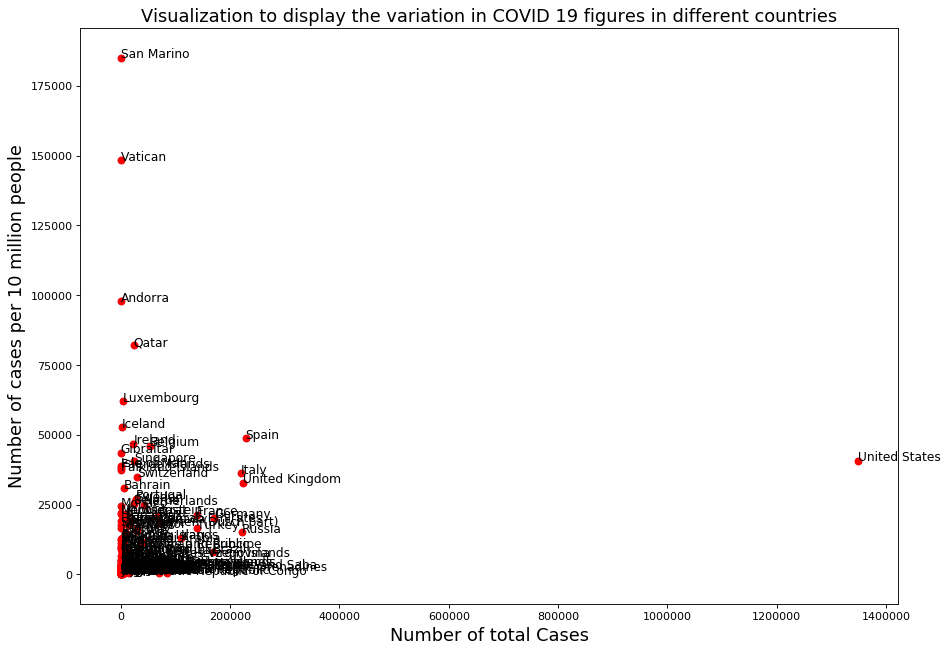

In [34]:
df = covid19_df_latest[(covid19_df_latest['total_cases']>=1000) | (covid19_df_latest['Cases/10million']>=200)]
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(covid19_df_latest['total_cases'], covid19_df_latest['Cases/10million'], alpha=0.5)
plt.xlabel('Number of total Cases', size=16)
plt.ylabel('Number of cases per 10 million people', size=16)
plt.scatter(df['total_cases'], df['Cases/10million'], color="red")
for i in range(df.shape[0]):
    plt.annotate(df['location'].tolist()[i], xy=(df['total_cases'].tolist()[i], df['Cases/10million'].tolist()[i]),
                xytext = (df['total_cases'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0), size=11)
plt.tight_layout()    
plt.title('Visualization to display the variation in COVID 19 figures in different countries', size=16)
plt.show()

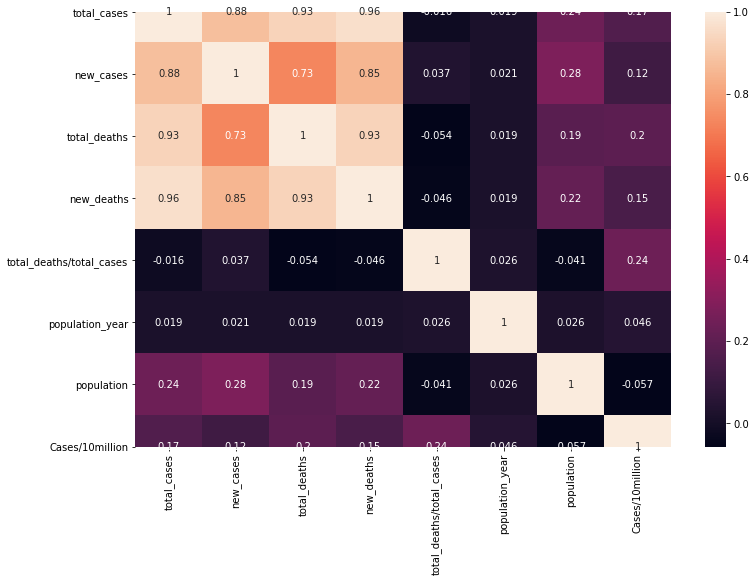

In [35]:
plt.figure(figsize = (12,8))
sns.heatmap(covid19_df_latest.corr(), annot=True)